# Define Constants

In [1]:
from random import randint
from IPython.display import clear_output
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

input_path = './chest_Xray/'
data_set = 'test'
img_dims = 150

def process_test_data(img_dims):
    test_data = []
    test_labels = []

    for cond in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(input_path + data_set + cond)):
            img = plt.imread(input_path + data_set + cond + img)
            img = cv2.resize(img, (img_dims, img_dims))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if cond == '/NORMAL/':
                label = 0
            elif cond == '/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)

    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    print("Test data shape: {}".format(test_data.shape))

    return test_data, test_labels

# Import Data

In [2]:
n_normal = len(os.listdir(input_path + 'test' + '/NORMAL'))
n_infect = len(os.listdir(input_path + 'test' + '/PNEUMONIA'))
print('Set: {}, normal images: {}, pneumonia images: {}'.format(
    'test', n_normal, n_infect))

test_data, test_labels = process_test_data(img_dims)

Set: test, normal images: 234, pneumonia images: 390
Test data shape: (624, 150, 150, 3)


# Import pre-trained Models

In [3]:
from tensorflow.keras.models import load_model

modelList = []
for fold in os.listdir('./saved_models_v2/'):
    m = load_model('./saved_models_v2/' + fold)
    modelList.append([m, fold])
    print("Imported: {}/{}".format(len(modelList),
        len(os.listdir('./saved_models_v2/'))))
    clear_output(wait=True)
print("Import OK")

Import OK


# Evaluate Models

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

i = 0
max_index_acc = 0
max_index_f = 0
max_name_acc = ""
max_name_f = ""
max_acc = 0
max_f = 0
for model in modelList:
    print("{}/{} - {}".format(i + 1, len(modelList), model[1]), end=" - ")
    loss, acc = model[0].evaluate(
        test_data, test_labels, verbose=2)
    # preds = modelList[max_index_acc][0].predict(test_data)

    # cm = confusion_matrix(test_labels, np.round(preds))
    # tn, fp, fn, tp = cm.ravel()
    # precision = tp/(tp+fp)*100
    # recall = tp/(tp+fn)*100
    # f = 2 * precision * recall/(precision + recall)
    if (acc > max_acc):
        max_acc = acc
        max_name_acc = model[1]
        max_index_acc = i
    # if (f > max_f):
    #    max_f = f
    #    max_name_f = model[1]
    #    max_index_f = i
    i += 1

    # print(model[1] + ' - Accuracy: {:5.2f}%'.format(100 * acc))
print("\nBest acc: {} at index: {}\n".format(max_name_acc, max_index_acc))
# print("Best F1: {} at index: {}".format(max_name_f, max_index_f))

1/19 - 40_adam_b128_a89_f91 - 20/20 - 2s - loss: 0.2954 - accuracy: 0.8974
2/19 - 30_adam_b128_a91_f93 - 20/20 - 2s - loss: 0.2552 - accuracy: 0.9167
3/19 - 10_adam_b32_a90 - 20/20 - 2s - loss: 0.2919 - accuracy: 0.9071
4/19 - 20_adam_b32_a91 - 20/20 - 2s - loss: 0.2453 - accuracy: 0.9167
5/19 - 30_adam_b64_a89_f92 - 20/20 - 2s - loss: 0.2906 - accuracy: 0.8958
6/19 - 15_adam_b32_a89 - 20/20 - 2s - loss: 0.2745 - accuracy: 0.8958
7/19 - 40_adam_b96_a89_f91 - 20/20 - 2s - loss: 0.2738 - accuracy: 0.8926
8/19 - 100_adam_b256_a87_f90 - 20/20 - 2s - loss: 0.3251 - accuracy: 0.8782
9/19 - 30_adam_b32_a91 - 20/20 - 2s - loss: 0.2297 - accuracy: 0.9151
10/19 - 15_adam_b64_a89_f92 - 20/20 - 2s - loss: 0.2519 - accuracy: 0.8990
11/19 - 10_adam_b128_a62_f76 - 20/20 - 2s - loss: 0.6532 - accuracy: 0.6250
12/19 - 10_adam_b64_a81_f82 - 20/20 - 2s - loss: 0.3727 - accuracy: 0.8109
13/19 - 20_adam_b96_a92_f94 - 20/20 - 2s - loss: 0.1875 - accuracy: 0.9279
14/19 - 20_adam_b64_a92 - 20/20 - 2s - loss: 

# Display most accurate model info

--- DATA FOR MAX ACC AT 20_adam_b96_a92_f94 ---

TEST METRICS ----------------------
Accuracy: 92.78846153846155%
Precision: 90.78014184397163%
Recall: 98.46153846153847%
F1-score: 94.46494464944651

CONFUSION MATRIX ------------------
[[195  39]
 [  6 384]]


<AxesSubplot:>

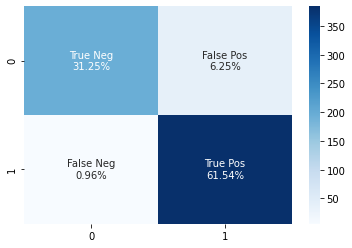

In [6]:
import seaborn as sns
from tensorflow.keras.utils import plot_model

# model = modelList[max_index_acc][0]
# plot_model(model, to_file='v2_plot_model.png', show_shapes=True)
preds = modelList[max_index_acc][0].predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print("--- DATA FOR MAX ACC AT {} ---\n".format(modelList[max_index_acc][1]))

print('TEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
f = 2 * precision * recall/(precision + recall)
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(f))

print('\nCONFUSION MATRIX ------------------')
print(cm)
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_percentages = ["{0:.2%}".format(value)
                     for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v3}" for v1, v3 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# Display all model's confusion matrix

40_adam_b128_a89_f91


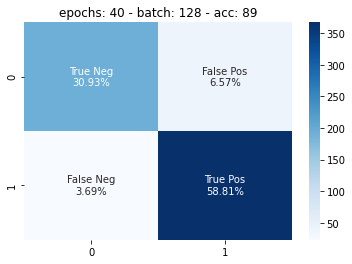

30_adam_b128_a91_f93


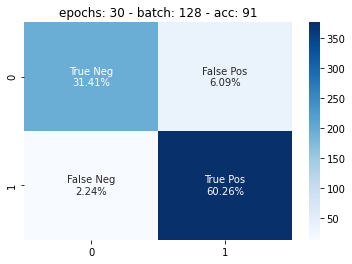

10_adam_b32_a90


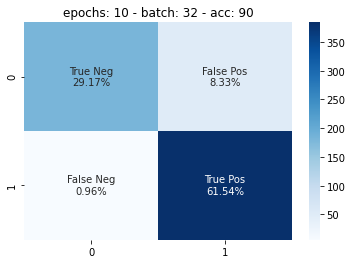

20_adam_b32_a91


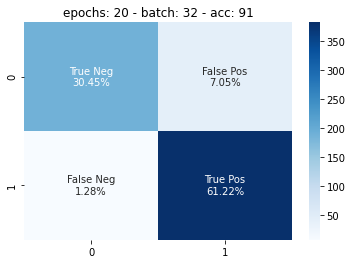

30_adam_b64_a89_f92


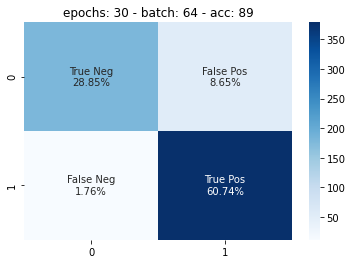

15_adam_b32_a89


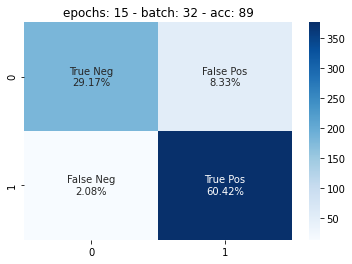

40_adam_b96_a89_f91


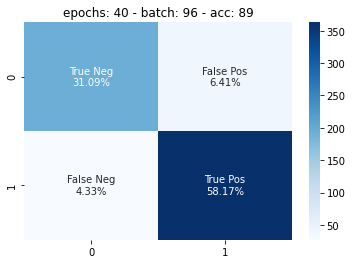

30_adam_b32_a91


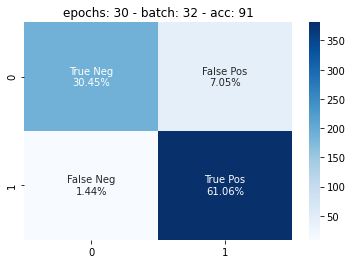

15_adam_b64_a89_f92


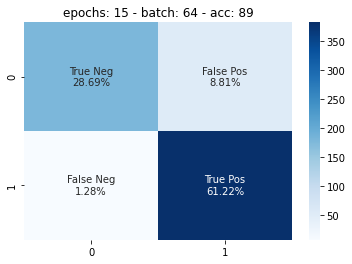

10_adam_b128_a62_f76


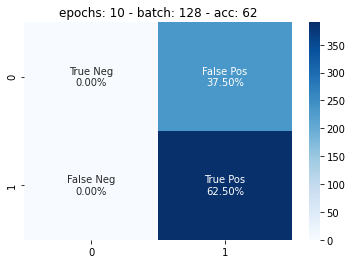

10_adam_b64_a81_f82


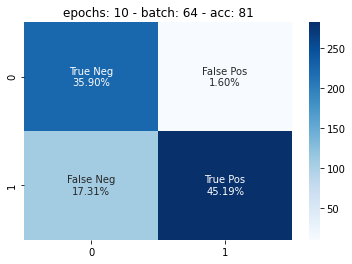

20_adam_b96_a92_f94


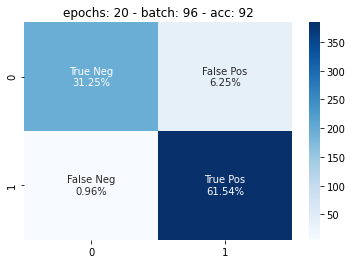

20_adam_b64_a92


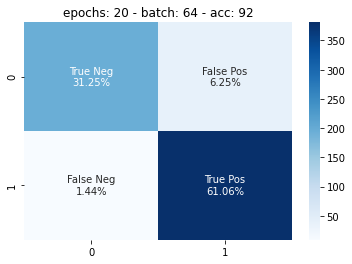

30_adam_b96_a91_f93


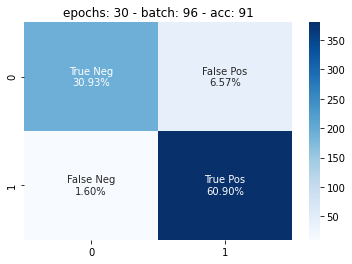

15_adam_b128_a62_f76


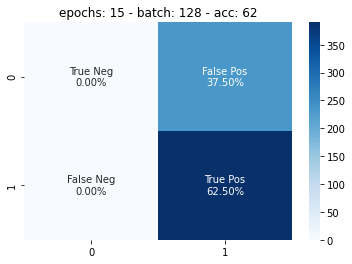

10_adam_b96_a62_f76


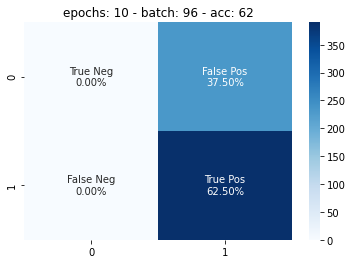

20_adam_b128_a85_f89


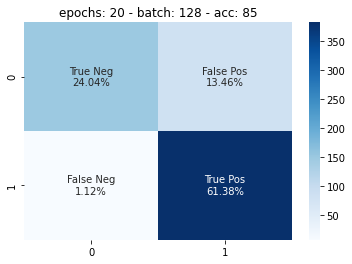

15_adam_b96_a62_f76


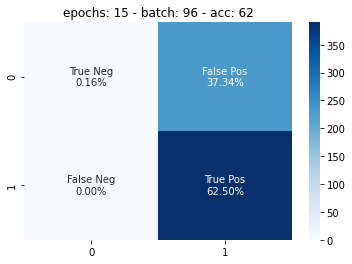

In [11]:
for model in modelList:
    preds = model[0].predict(test_data)

    acc = accuracy_score(test_labels, np.round(preds))*100
    cm = confusion_matrix(test_labels, np.round(preds))
    tn, fp, fn, tp = cm.ravel()

    precision = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    f = 2 * precision * recall/(precision + recall)

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ["{0:.2%}".format(value)
                        for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v3}" for v1, v3 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    t = model[1].split('_')
    title = "epochs: {} - batch: {} - acc: {}".format(t[0], t[2].split('b')[1], t[3].split('a')[1])
    plt.title(title)
    print(model[1])
    plt.show()